In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('insurance2.csv')
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [17]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [19]:
X = df.iloc[:,:-1]
y = df['insuranceclaim']

In [20]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [25]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [26]:
print(model.feature_importances_)

[0.11981846 0.0140808  0.3247966  0.24424721 0.09422893 0.03879413
 0.16403387]


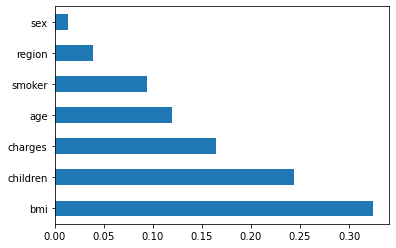

In [27]:
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features.nlargest(len(X.columns)).plot(kind='barh')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [29]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      age  sex     bmi  children  smoker  region      charges
621    37    1  34.100         4       1       3  40182.24600
194    18    1  34.430         0       0       2   1137.46970
240    23    0  36.670         2       1       0  38511.62830
1168   32    1  35.200         2       0       3   4670.64000
1192   58    0  32.395         1       0       0  13019.16105
      age  sex     bmi  children  smoker  region      charges
578    52    1  30.200         1       0       3   9724.53000
610    47    0  29.370         1       0       2   8547.69130
569    48    1  40.565         2       1       1  45702.02235
1034   61    1  38.380         0       0       1  12950.07120
198    51    0  18.050         0       0       1   9644.25250
621     1
194     1
240     1
1168    0
1192    1
Name: insuranceclaim, dtype: int64
578     1
610     0
569     1
1034    1
198     0
Name: insuranceclaim, dtype: int64


In [30]:
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier(n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features='sqrt', max_depth=10, criterion='entropy')
random_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=900)

In [31]:
random_clf_predict = random_clf.predict(X_test)

In [32]:
random_clf_predict

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix
random_clf_cm = confusion_matrix(y_test,random_clf_predict)
random_clf_cm

array([[119,   4],
       [  4, 141]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
random_clf_report = classification_report(y_test,random_clf_predict)
print(random_clf_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       123
           1       0.97      0.97      0.97       145

    accuracy                           0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268



In [35]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
criterion = ['entropy','gini']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [36]:
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'criterion': ['entropy', 'gini'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [37]:
rf_random = RandomizedSearchCV(estimator = random_clf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [38]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END criterion=entropy, max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.2s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END criterion=entropy, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    max_features='sqrt',
                                                    min_samples_leaf=5,
                                                    min_samples_split=5,
                                                    n_estimators=900),
                   n_jobs=1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700

In [39]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'criterion': 'gini'}

In [40]:
rf_random.best_score_

-0.055140186915887845

In [41]:
predictions=rf_random.predict(X_test)
predictions

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       123
           1       0.98      0.98      0.98       145

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



In [43]:
import pickle

file = open('rf_random_model.pkl','wb')


pickle.dump(rf_random,file)